In [3]:
#boilerplate
import os
from fastai.basics import *
from fastai.vision.all import *
from fastai.callback.all import *
import datetime 
import pytz  

!pip show fastai
print(datetime.datetime.now(pytz.timezone('Asia/Kolkata')))
print('cwd : {}'.format(os.getcwd()))

from fastai.vision.all import *
from fastaudio.core.all import *
from fastaudio.augment.all import *

Name: fastai
Version: 2.0.13
Summary: fastai simplifies training fast and accurate neural nets using modern best practices
Home-page: https://github.com/fastai/fastai/tree/master/
Author: Jeremy Howard, Sylvain Gugger, and contributors
Author-email: info@fast.ai
License: Apache Software License 2.0
Location: /Users/ganesh/opt/anaconda3/envs/fastaudio/lib/python3.8/site-packages
Requires: pandas, matplotlib, scipy, scikit-learn, torchvision, spacy, pip, requests, fastprogress, pyyaml, fastcore, packaging, pillow, torch
Required-by: fastaudio
2020-09-27 17:07:24.861046+05:30
cwd : /Users/ganesh/OneDrive - Myelin Foundry Pvt Ltd/Code/LEARNING/GS_EXPERIMENTS/fastaudio


In [18]:
import librosa
import librosa.display
from IPython.display import Audio
path = Path(os.getcwd())

In [5]:
path.ls()

(#5) [Path('/Users/ganesh/OneDrive - Myelin Foundry Pvt Ltd/Code/LEARNING/GS_EXPERIMENTS/fastaudio/fastaudio_audio_basics.ipynb'),Path('/Users/ganesh/OneDrive - Myelin Foundry Pvt Ltd/Code/LEARNING/GS_EXPERIMENTS/fastaudio/spectrogram_1.ipynb'),Path('/Users/ganesh/OneDrive - Myelin Foundry Pvt Ltd/Code/LEARNING/GS_EXPERIMENTS/fastaudio/Haunting_song_of_humpback_whales-youtube-W5Trznre92c.wav'),Path('/Users/ganesh/OneDrive - Myelin Foundry Pvt Ltd/Code/LEARNING/GS_EXPERIMENTS/fastaudio/.ipynb_checkpoints'),Path('/Users/ganesh/OneDrive - Myelin Foundry Pvt Ltd/Code/LEARNING/GS_EXPERIMENTS/fastaudio/fastaudio_1.ipynb')]

In [6]:
fnames = path.ls()

In [7]:
fnames

(#5) [Path('/Users/ganesh/OneDrive - Myelin Foundry Pvt Ltd/Code/LEARNING/GS_EXPERIMENTS/fastaudio/fastaudio_audio_basics.ipynb'),Path('/Users/ganesh/OneDrive - Myelin Foundry Pvt Ltd/Code/LEARNING/GS_EXPERIMENTS/fastaudio/spectrogram_1.ipynb'),Path('/Users/ganesh/OneDrive - Myelin Foundry Pvt Ltd/Code/LEARNING/GS_EXPERIMENTS/fastaudio/Haunting_song_of_humpback_whales-youtube-W5Trznre92c.wav'),Path('/Users/ganesh/OneDrive - Myelin Foundry Pvt Ltd/Code/LEARNING/GS_EXPERIMENTS/fastaudio/.ipynb_checkpoints'),Path('/Users/ganesh/OneDrive - Myelin Foundry Pvt Ltd/Code/LEARNING/GS_EXPERIMENTS/fastaudio/fastaudio_1.ipynb')]

In [13]:
humpback = fnames[2]

In [14]:
humpback

Path('/Users/ganesh/OneDrive - Myelin Foundry Pvt Ltd/Code/LEARNING/GS_EXPERIMENTS/fastaudio/Haunting_song_of_humpback_whales-youtube-W5Trznre92c.wav')

In [19]:
y, sr = librosa.load(humpback, sr=None)
Audio(y,rate=sr)

In [20]:
sr

44100

In [21]:
type(y)

numpy.ndarray

In [22]:
y

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [23]:
len(y)

1893376

In [27]:
len(y)*(1/sr)

42.93369614512472

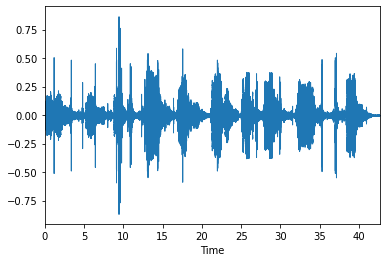

In [26]:
whale_song, _ = librosa.effects.trim(y)
librosa.display.waveplot(whale_song, sr=sr);

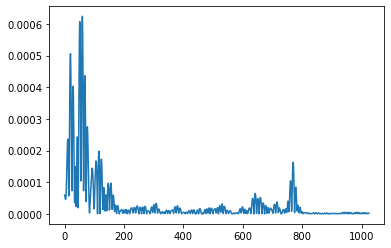

In [28]:
import numpy as np
import matplotlib.pyplot as plt

n_fft = 2048
D = np.abs(librosa.stft(whale_song[:n_fft], n_fft=n_fft, hop_length=n_fft+1))
plt.plot(D);

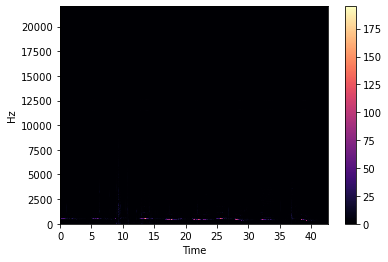

In [29]:
hop_length = 512
D = np.abs(librosa.stft(whale_song, n_fft=n_fft,  hop_length=hop_length))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear');
plt.colorbar();

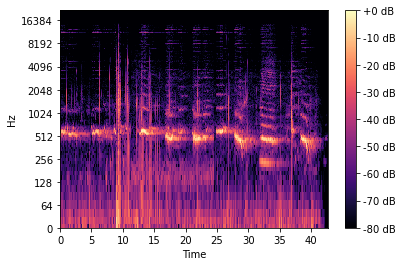

In [33]:
DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');

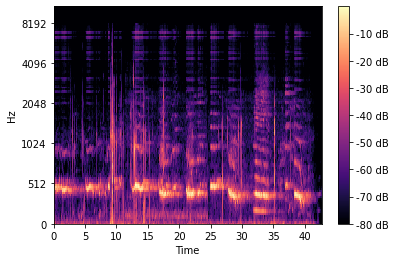

In [35]:
n_mels = 128
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)
S = librosa.feature.melspectrogram(whale_song, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');